In [1]:
import networkx as nx
import numpy as np
import random
import nltk
import pandas as pd
import pickle

In [2]:
letters = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',
           'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l',
           'z', 'x', 'c', 'v', 'b', 'n', 'm']

In [3]:
# f = open('words/google-10000-english.txt', 'r')
# words = f.readlines()
# words = [word.rstrip() for word in words if len(word.rstrip()) > 1]

In [4]:
df = pd.read_pickle('words/freqword.p')

In [5]:
df.set_index('word', inplace=True)

In [6]:
words = df.to_dict('index')

In [7]:
str.isalpha

<method 'isalpha' of 'str' objects>

In [8]:
words = {key:words[key] for key in words.keys() if key.isalpha()}

In [9]:
def define_graph(G_left, G_right):
    G_left.add_nodes_from(range(0,15))
    G_right.add_nodes_from(range(0,11))

    G_left.add_edge(0, 1)
    G_left.add_edge(0, 5)
    G_left.add_edge(0, 6)

    G_left.add_edge(1, 2)
    G_left.add_edge(1, 5)
    G_left.add_edge(1, 6)
    G_left.add_edge(1, 7)

    G_left.add_edge(2, 3)
    G_left.add_edge(2, 6)
    G_left.add_edge(2, 7)
    G_left.add_edge(2, 8)

    G_left.add_edge(3, 4)
    G_left.add_edge(3, 7)
    G_left.add_edge(3, 8)
    G_left.add_edge(3, 9)

    G_left.add_edge(4, 8)
    G_left.add_edge(4, 9)

    G_left.add_edge(5, 6)
    G_left.add_edge(5, 10)
    G_left.add_edge(5, 11)

    G_left.add_edge(6, 7)
    G_left.add_edge(6, 10)
    G_left.add_edge(6, 11)
    G_left.add_edge(6, 12)

    G_left.add_edge(7, 8)
    G_left.add_edge(7, 11)
    G_left.add_edge(7, 12)
    G_left.add_edge(7, 13)

    G_left.add_edge(8, 9)
    G_left.add_edge(8, 12)
    G_left.add_edge(8, 13)
    G_left.add_edge(8, 14)

    G_left.add_edge(9, 13)
    G_left.add_edge(9, 14)

    G_left.add_edge(10, 11)
    G_left.add_edge(11, 12)
    G_left.add_edge(12, 13)
    G_left.add_edge(13, 14)


    G_right.add_edge(0, 1)
    G_right.add_edge(0, 5)
    G_right.add_edge(0, 6)

    G_right.add_edge(1, 2)
    G_right.add_edge(1, 5)
    G_right.add_edge(1, 6)
    G_right.add_edge(1, 7)

    G_right.add_edge(2, 3)
    G_right.add_edge(2, 6)
    G_right.add_edge(2, 7)
    G_right.add_edge(2, 8)

    G_right.add_edge(3, 4)
    G_right.add_edge(3, 7)
    G_right.add_edge(3, 8)

    G_right.add_edge(4, 8)

    G_right.add_edge(5, 6)
    G_right.add_edge(5, 9)
    G_right.add_edge(5, 10)

    G_right.add_edge(6, 7)
    G_right.add_edge(6, 9)
    G_right.add_edge(6, 10)

    G_right.add_edge(7, 8)
    G_right.add_edge(9, 10)

In [10]:
def make_rnd_keyboard_layout(G_left, G_right):
    left_attrs = {}
    right_attrs = {}
    
    tmp = letters.copy()
    for i in range(15):
        left_letter = random.choice(tmp)
        left_attrs[i] = left_letter
        tmp.remove(left_letter)
        
        if i <= 10:
            right_letter = random.choice(tmp)
            right_attrs[i] = right_letter
            tmp.remove(right_letter)
    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)
    return G_left, G_right

In [11]:
def create_graphs_dict(num:int):
    d_left = {}
    d_right = {}
    for i in range(num):
        d_left["{0}".format(i)] = nx.Graph()
        d_right["{0}".format(i)] = nx.Graph()
        define_graph(d_left["{0}".format(i)], d_right["{0}".format(i)])
        d_left["{0}".format(i)],d_right["{0}".format(i)] =  make_rnd_keyboard_layout(d_left["{0}".format(i)], d_right["{0}".format(i)])
        
    return d_left, d_right

In [12]:
def mutation(G_left, G_right):
    indexes = random.sample(range(26), 2)
    G_left_list = list(G_left.nodes)
    G_right_list = list(G_right.nodes)
    
    if indexes[0] <= 14 and indexes[1] <= 14:
        l = G_left_list[indexes[0]]
        r = G_left_list[indexes[1]]

        G_left = nx.relabel_nodes(G_left, {l:r, r:l})        
    elif indexes[0] <= 14 and indexes[1] > 14:
        l = G_left_list[indexes[0]]
        r = G_right_list[indexes[1]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] <= 14:
        l = G_left_list[indexes[1]]
        r = G_right_list[indexes[0]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] > 14:
        l = G_right_list[indexes[0]-15]
        r = G_right_list[indexes[1]-15]
        
        G_right = nx.relabel_nodes(G_right, {l:r, r:l})
        
    return [G_left, G_right]

In [13]:
def set_keyboard_layout(G_left, G_right, tab):
    left_attrs = {}
    right_attrs = {}

    for i,x in enumerate(G_left.nodes):
        left_attrs["{}".format(x)] = tab[i]
    for i,x in enumerate(G_right.nodes):
        right_attrs["{}".format(x)] = tab[15+i]
    #print(left_attrs)
    
    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)
    
    return G_left, G_right

In [14]:
def crossover(G_left1, G_right1, G_left2, G_right2):
    """Executes a partially matched crossover (PMX) on the input individuals"""
    ind1, ind2 = [], []  
    G_left_list1, G_left_list2 = list(G_left1.nodes), list(G_left2.nodes)
    G_right_list1, G_right_list2 = list(G_right1.nodes), list(G_right2.nodes)
    
    for i in range(15):
        ind1.append(G_left_list1[i])
        ind2.append(G_left_list2[i])
    for i in range(11):
        ind1.append(G_right_list1[i])
        ind2.append(G_right_list2[i])
        
    size = min(len(ind1), len(ind2))
    
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    
    if cxpoint2 >= cxpoint1:
        pass
    else:  # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
             
    for i in range(0, 3):
        temp1 = ind1[i]
        temp2 = ind2[i]
        
        p = ind1.index(temp2)
        p2 = ind2.index(temp1)
        
        ind1[i] = temp2
        ind2[i] = temp1
        
        ind1[p] = temp1
        ind2[p2] = temp2
        
        
    G_left1, G_right1 = set_keyboard_layout(G_left1, G_right1, ind1)
    G_left2, G_right2 = set_keyboard_layout(G_left2, G_right2, ind2)
        
    return [G_left1, G_right1, G_left2, G_right2]

In [15]:
def score_word(word, zipf, G_left_nodes, G_right_nodes, spl_G_left, spl_G_right):
    hand = 'left' if word[0] in G_left_nodes else 'right'
    sum_lenght = 0
    for i in range(len(word)-1):
        if hand == 'left':
#             print('left')
            if word[i+1] in G_left_nodes:
                sum_lenght += spl_G_left[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'right'
        else:
#             print('right')
            if word[i+1] in G_right_nodes:
                sum_lenght += spl_G_right[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'left'
    return sum_lenght * zipf

In [16]:
def score(word_list, G_left, G_right):
    G_left_nodes = G_left.nodes()
    G_right_nodes = G_right.nodes()
    spl_G_left = dict(nx.all_pairs_shortest_path_length(G_left))
    spl_G_right = dict(nx.all_pairs_shortest_path_length(G_right))
    sum_len = 0
    for word in word_list.keys():
        sum_len += score_word(word, word_list[word]['freq'], G_left_nodes, G_right_nodes, spl_G_left, spl_G_right)
    return len(word_list)/sum_len

In [17]:
import numpy.random as npr


def selectOne(d_left, d_right, fitness):
    max = sum(fitness)
    selection_probs = [c/max for c in fitness]
    return npr.choice(min(len(d_left), len(d_right)), p=selection_probs)

def selectBest(tournament, fitness):
    max_index = fitness.index(max(fitness))
    #print(max_index, max(fitness))
    return max_index

def selection(d_left, d_right, fitness):
    length = min(len(d_left), len(d_right))
    
    best = selectBest(length, fitness)
    d_left['0'] = d_left['{}'.format(best)]
    d_right['0'] = d_right['{}'.format(best)]
    
    for i in range(1,length):
        chosen = selectOne(d_left, d_right, fitness)
        d_left['{}'.format(i)] = d_left['{}'.format(chosen)]
        d_right['{}'.format(i)] = d_right['{}'.format(chosen)]


"""
def selectOne(tournament, fitness):
    fit = [fitness[i] for i in tournament]
    max_index = fitness.index(max(fit))
    return max_index

def selection(d_left, d_right, fitness, t):
    length = min(len(d_left), len(d_right))
    for i in range(length):
        r = random.randint(1, t)
        tour = random.sample(range(0,length), r)
        chosen = selectOne(tour, fitness)
        d_left['{}'.format(i)] = d_left['{}'.format(chosen)]
        d_right['{}'.format(i)] = d_right['{}'.format(chosen)]
"""

"\ndef selectOne(tournament, fitness):\n    fit = [fitness[i] for i in tournament]\n    max_index = fitness.index(max(fit))\n    return max_index\n\ndef selection(d_left, d_right, fitness, t):\n    length = min(len(d_left), len(d_right))\n    for i in range(length):\n        r = random.randint(1, t)\n        tour = random.sample(range(0,length), r)\n        chosen = selectOne(tour, fitness)\n        d_left['{}'.format(i)] = d_left['{}'.format(chosen)]\n        d_right['{}'.format(i)] = d_right['{}'.format(chosen)]\n"

In [18]:
import itertools

def algorithm(d_left, d_right, steps, mutation_prob=0, crossover_prob=0):
    
    sum_list = []
    max_temp_list = []
    min_temp_list = []
    max_list = []
    min_list = []
    max_score = 0
    min_score = 0
    
    length = min(len(d_left), len(d_right))
    
    fitness = [ score(words, l, r) for i,(l,r) in enumerate(zip(d_left.values(), d_right.values())) ]
    for i in range(steps):
        if i%50 == 0:
            print('Generation {}'.format(i))
            
        selection(d_left, d_right, fitness)
         
        for y in range(length):
            if crossover_prob >= npr.rand():
                p = random.sample(range(length), 2)
                d_left['{}'.format(p[0])], d_right['{}'.format(p[0])], d_left['{}'.format(p[1])], d_right['{}'.format(p[1])] = crossover(
                    d_left['{}'.format(p[0])], d_right['{}'.format(p[0])], d_left['{}'.format(p[1])], d_right['{}'.format(p[1])])
        
        
        a = mutation_prob/steps
        for l,r in zip(d_left.values(), d_right.values()):
            if a*(steps-i) >= npr.rand():
                l,r = mutation(l, r)
                
        fitness = [ score(words, l, r) for i,(l,r) in enumerate(zip(d_left.values(), d_right.values())) ]
        
        sum_list.append(sum(fitness))
        
        if max_score < max(fitness):
            max_score = max(fitness)
            G_left = d_left['{}'.format(fitness.index(max(fitness)))]
            G_right = d_right['{}'.format(fitness.index(max(fitness)))]
            
        if min_score < min(fitness):
            min_score = min(fitness)
            
        max_list.append(max_score)
        min_list.append(min_score)
        
        max_temp_list.append(max(fitness))
        min_temp_list.append(min(fitness))
                
    return sum_list, max_list, min_list, max_temp_list, min_temp_list, G_left, G_right

In [19]:
%%time
d_left, d_right = create_graphs_dict(600)

sum_list, max_list, min_list, max_temp_list, min_temp_list, G_left_best, G_right_best = algorithm(d_left, d_right, 100, mutation_prob=0.27, crossover_prob=0.86)

Generation 0
Generation 50
Wall time: 3min 40s


In [20]:
score(words, G_left_best, G_right_best)

521.6692321783521

In [155]:
G_left_best_529_68 = G_left_best
G_right_best_529_68 = G_right_best

In [156]:
score(words, G_left_best_529_68, G_right_best_529_68)

529.6860139017595

In [157]:
nx.write_gpickle(G_left_best_529_68, "G_left_best.gpickle")
nx.write_gpickle(G_right_best_529_68, "G_right_best.gpickle")

In [48]:
qwerty =  ['q', 'w', 'e', 'r', 't', 
           'a', 's', 'd', 'f', 'g',
           'z', 'x', 'c', 'v', 'b',
           
           'y', 'u', 'i', 'o', 'p',
           'h', 'j', 'k', 'l',
           'n', 'm']

qwerty_left = nx.Graph()
qwerty_right = nx.Graph()
define_graph(qwerty_left, qwerty_right)
qwerty_left, qwerty_right = make_rnd_keyboard_layout(qwerty_left, qwerty_right)
qwerty_left, qwerty_right = set_keyboard_layout(qwerty_left, qwerty_right, qwerty)

In [49]:
score(words, qwerty_left, qwerty_right)

408.68905488728313

In [ ]:
%%time
#mutation_prob_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#crossover_prob_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
#                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

mutation_prob_list = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 
                      0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
crossover_prob_list = [0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94]


average = 5
size = 100
timesteps = 100

for m in mutation_prob_list:
    for c in crossover_prob_list:
        print('mutation_prob {}, crossover_prob {}'.format(m,c))
        
        sum_list_ac, max_list_ac, min_list_ac = np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps)
        max_temp_list_ac, min_temp_list_ac = np.zeros(timesteps), np.zeros(timesteps)
        for i in range(average):
            d_left, d_right = create_graphs_dict(size)
            sum_list, max_list, min_list, max_temp_list, min_temp_list = algorithm(d_left, d_right, timesteps, mutation_prob=m,
                                                                                   crossover_prob=c)    
            sum_list_ac = sum_list_ac + np.array(sum_list)/average
            max_list_ac = max_list_ac + np.array(max_list)/average
            min_list_ac = min_list_ac + np.array(min_list)/average
            max_temp_list_ac = max_temp_list_ac + np.array(max_temp_list)/average
            min_temp_list_ac = min_temp_list_ac + np.array(min_temp_list)/average
            
        with open('wyniki4/{}_{}.dat'.format(m,c), 'w+') as f:
            f.write('{}\t{}\t{}\t{}\t{}\n'.format('sum_fit', 'max_fit', 'min_fit', 'max_temp_fit', 'min_temp_fit'))
            for item in range(len(sum_list_ac)):
                f.write('{}\t{}\t{}\t{}\t{}\n'.format(sum_list_ac[item], max_list_ac[item], min_list_ac[item],
                                                       max_temp_list_ac[item], min_temp_list_ac[item]))

In [ ]:
%%time

average = 5
pm = 0.16
pc = 0.87
timesteps = 100
size_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]

for s in size_list:
    print('size {}'.format(s))

    sum_list_ac, max_list_ac, min_list_ac = np.zeros(timesteps), np.zeros(timesteps), np.zeros(timesteps)
    max_temp_list_ac, min_temp_list_ac = np.zeros(timesteps), np.zeros(timesteps)
    for i in range(average):
        d_left, d_right = create_graphs_dict(s)
        sum_list, max_list, min_list, max_temp_list, min_temp_list = algorithm(d_left, d_right, timesteps, mutation_prob=pm,
                                                                               crossover_prob=pc)    
        sum_list_ac = sum_list_ac + np.array(sum_list)/average
        max_list_ac = max_list_ac + np.array(max_list)/average
        min_list_ac = min_list_ac + np.array(min_list)/average
        max_temp_list_ac = max_temp_list_ac + np.array(max_temp_list)/average
        min_temp_list_ac = min_temp_list_ac + np.array(min_temp_list)/average

    with open('wyniki_populacja_pm0.16_pc0.87/{}.dat'.format(s), 'w+') as f:
        f.write('{}\t{}\t{}\t{}\t{}\n'.format('sum_fit', 'max_fit', 'min_fit', 'max_temp_fit', 'min_temp_fit'))
        for item in range(len(sum_list_ac)):
            f.write('{}\t{}\t{}\t{}\t{}\n'.format(sum_list_ac[item], max_list_ac[item], min_list_ac[item],
                                                   max_temp_list_ac[item], min_temp_list_ac[item]))

In [ ]:
def plot_keyboard(left_part, right_part):
    x1 = np.arange(114, 114+530, 53) + np.arange(10)
    y1 = np.repeat(170, 10)
    x2 = np.arange(129, 221+371, 53) + np.arange(9)
    y2 = np.repeat(223, 9)
    x3 = np.arange(155, 155+319, 53) + np.arange(7)
    y3 = np.repeat(277, 7)
    left = list(left_part.nodes())
    right = list(right_part.nodes())
    img = plt.imread("keyboard.png")
    fig, ax = plt.subplots(figsize=(20,8))
    for i, key in enumerate(left[:5], 0):
        ax.text(x1[i], y1[i], key, fontsize=16)
    for i, key in enumerate(left[5:10], 0):
        ax.text(x2[i], y2[i], key, fontsize=16)
    for i, key in enumerate(left[10:], 0):
        ax.text(x3[i], y3[i], key, fontsize=16)
    for i, key in enumerate(right[:5], 5):
        ax.text(x1[i], y1[i], key, fontsize=16)
    for i, key in enumerate(right[5:9], 5):
        ax.text(x2[i], y2[i], key, fontsize=16)
    for i, key in enumerate(right[9:], 5):
        ax.text(x3[i], y3[i], key, fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    plt.savefig('./keyboard_better.png')
    plt.show()

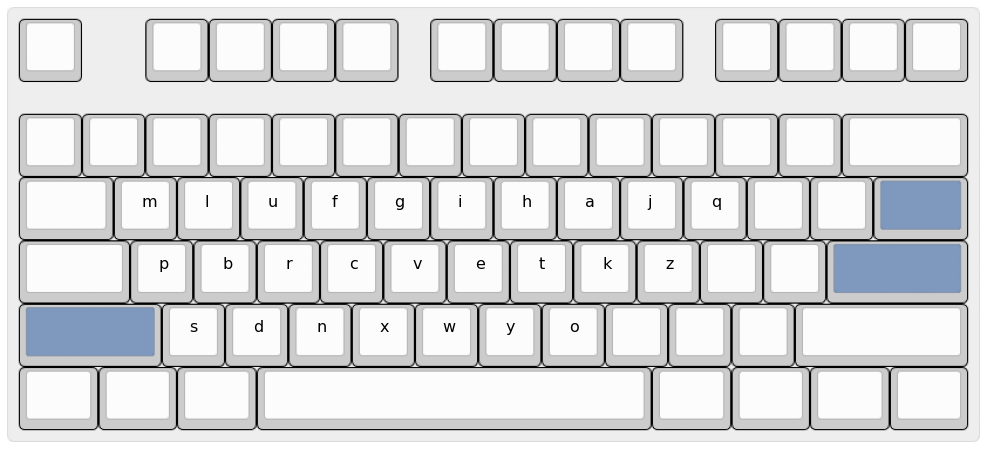

In [205]:
plot_keyboard(G_left_best_529_68, G_right_best_529_68)